Goal:
- Creating dummy features
- Scale standardization
- Split data into training and testing subsets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

In [3]:
df = pd.read_csv('cleaned_cust_data.csv')

In [4]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1388 non-null   int64  
 1   Gender              1388 non-null   int64  
 2   AnnualIncome        1388 non-null   float64
 3   NumberOfPurchases   1388 non-null   int64  
 4   ProductCategory     1388 non-null   int64  
 5   TimeSpentOnWebsite  1388 non-null   float64
 6   LoyaltyProgram      1388 non-null   int64  
 7   DiscountsAvailed    1388 non-null   int64  
 8   PurchaseStatus      1388 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 97.7 KB


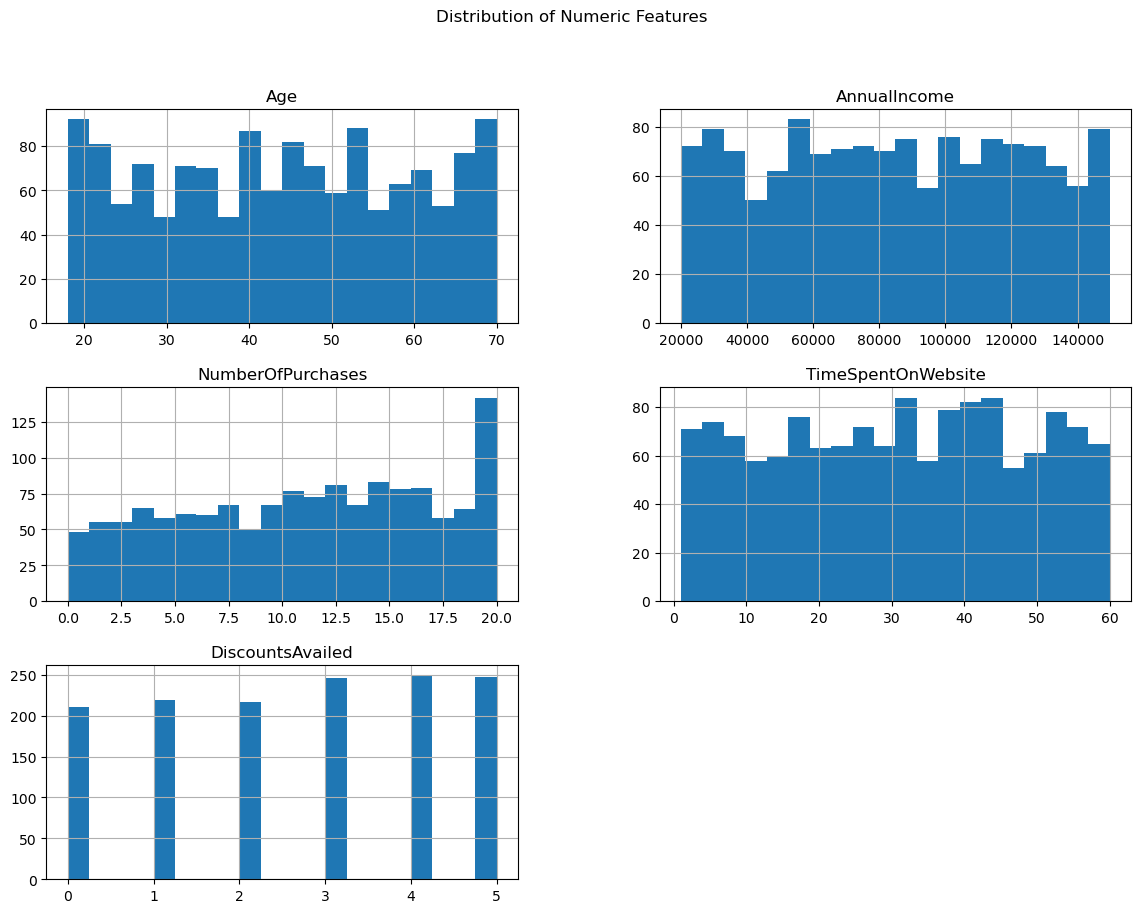

In [11]:
# Plotting the distribution of numeric features
numeric_features = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']
df[numeric_features].hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()

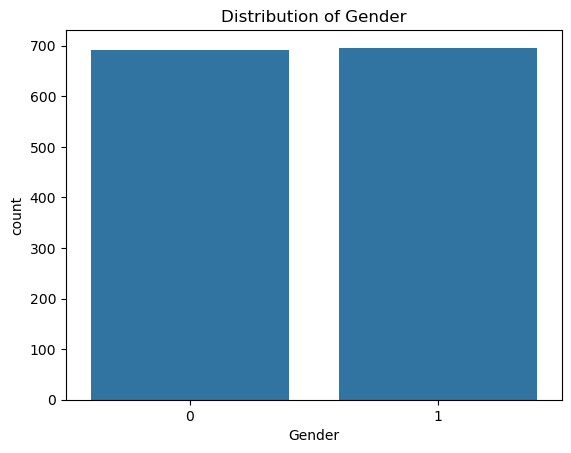

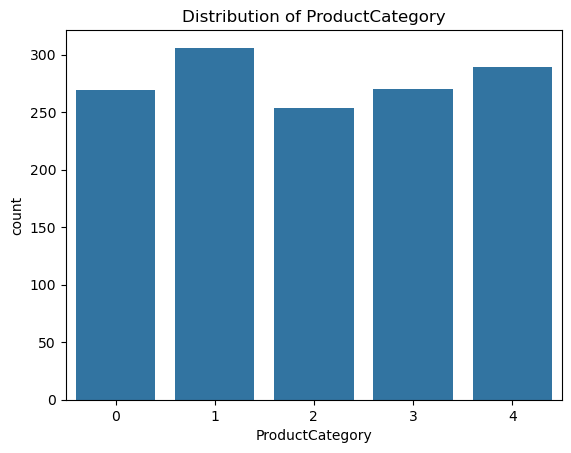

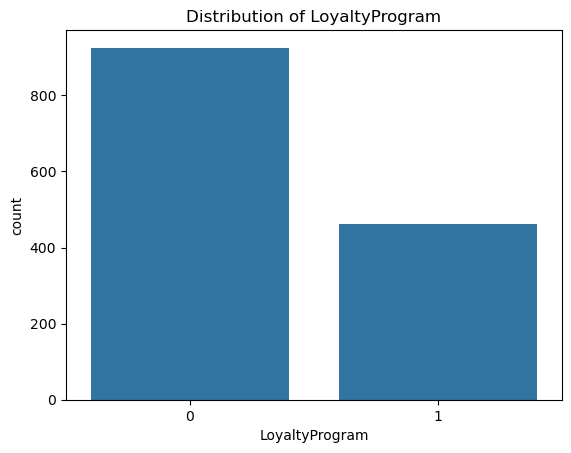

In [13]:
# Plotting the distribution of categorical features
categorical_features = df[['Gender', 'ProductCategory', 'LoyaltyProgram']]

for feature in categorical_features:
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

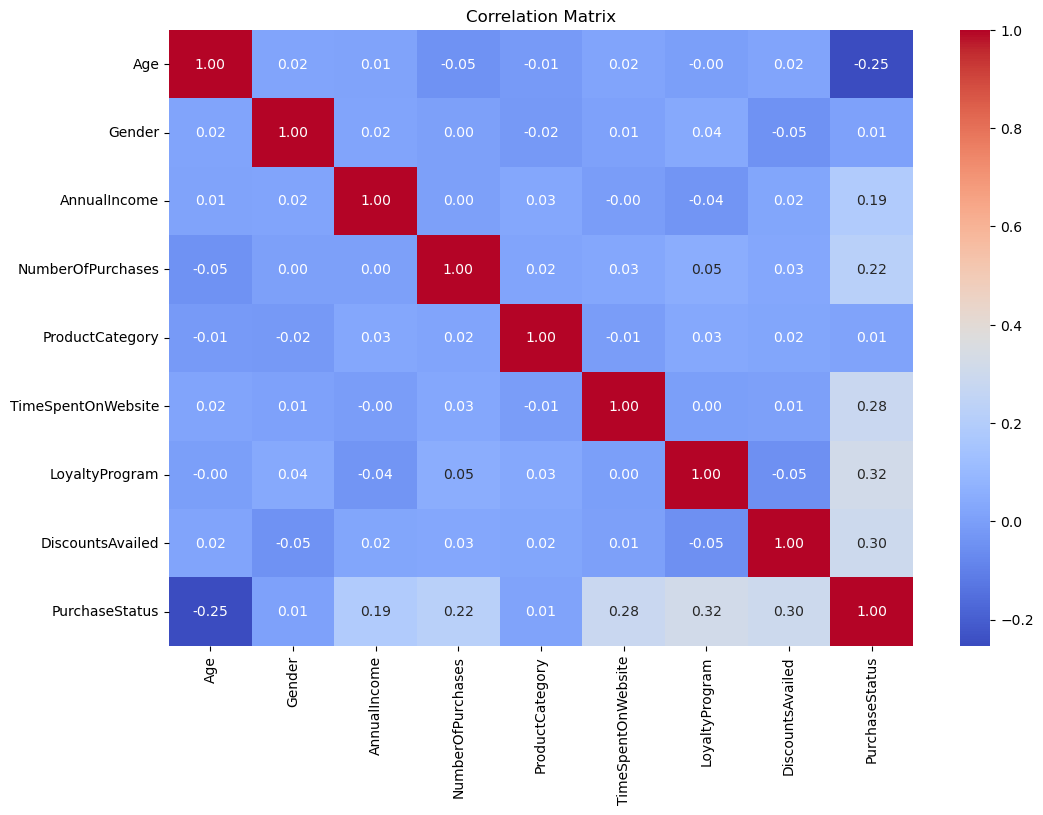

In [15]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Strongest Positive Correlations:

LoyaltyProgram and PurchaseStatus (0.32): There is a moderate positive correlation between participation in a loyalty program and purchase status, suggesting customers in a loyalty program are more likely to make purchases.
DiscountsAvailed and PurchaseStatus (0.30): Customers who availed of discounts are more likely to complete purchases.
TimeSpentOnWebsite and PurchaseStatus (0.28): More time spent on the website correlates with a higher likelihood of completing a purchase.
NumberOfPurchases and PurchaseStatus (0.22): More frequent purchasing behavior correlates with completing a purchase.
AnnualIncome and PurchaseStatus (0.19): A mild positive correlation, suggesting higher income might slightly increase the likelihood of purchasing.

Gender shows weak correlations with all variables, suggesting it doesn't significantly influence purchase behavior.
ProductCategory has weak correlations with other features, indicating product type doesn't heavily influence purchase behavior in this dataset.

Negative Correlations:
Age and PurchaseStatus (-0.25): There is a negative correlation, indicating older customers are less likely to make purchases compared to younger ones.

Summary:
Loyalty programs, discounts, and time spent on the website positively influence purchase status.
Age negatively impacts purchasing behavior.
Gender and product category have minimal impact on purchase behavior in this dataset.

Preprocessing Below

In [25]:
#Encoding categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(categorical_features).toarray()

In [23]:
#normalizing our numeric columns
columns_to_normalize = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']

#define data to normalize
data_to_normalize = df[columns_to_normalize]

#initialize
scaler = MinMaxScaler()

#apply scaler
normalized_data = scaler.fit_transform(data_to_normalize)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Display the first few rows of the normalized data
normalized_df.head()

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,DiscountsAvailed
0,0.423077,0.355351,0.40,0.500925,1.0
1,0.038462,0.027571,0.20,0.631052,1.0
2,0.173077,0.830766,0.55,0.518983,0.0
3,0.115385,0.907642,0.95,0.765512,0.8
4,0.250000,0.611013,0.95,0.318664,0.0


Splitting the data

In [30]:
# Select features and target
X = normalized_df
y = df['PurchaseStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)